<a href="https://colab.research.google.com/github/Yeon-Jun-Kim/YJ---Git/blob/main/%EB%B3%B8%EC%9B%90%ED%86%B5%ED%99%94%EB%9F%89_%EB%AC%BC%EA%B0%80_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- data set: 2021.1.4~2021.4.6일
- 장단기금리차 확대(경기회복 변수)가 s&p500 주가를 올리는가?

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
print(np.__version__)
print(pd.__version__)
print(tf.__version__)

1.21.6
1.3.5
2.8.2


In [20]:
from google.colab import files
uploaded = files.upload()
#data = 'lab01_spx+usyc2y10.xlsx'

Saving ECOS_TABLE_20220403_172045.xlsx to ECOS_TABLE_20220403_172045 (2).xlsx


In [21]:
df = pd.read_excel('ECOS_TABLE_20220403_172045.xlsx', sheet_name='Sheet2') # with header
df.head()

,consump,central,consump_2,central_2
0,99.94,193354.2,4.604570,12.172279
1,99.50,203261.7,4.600158,12.222250
2,99.44,208003.2,4.599554,12.245309
3,99.71,217045.2,4.602266,12.287861
4,99.63,214282.2,4.601463,12.275049


### 미 장단기 금리차 vs 주가

(23,) (23,)


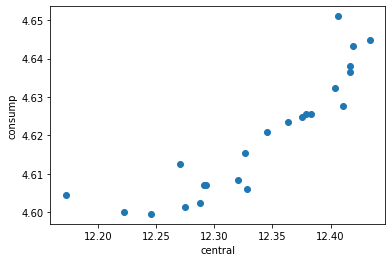

In [22]:
# data
y_data = df['consump_2']
x_data = df['central_2']
print(x_data.shape, y_data.shape)

plt.plot(x_data, y_data,'o')
plt.xlabel('central')
plt.ylabel('consump')
plt.show()

In [23]:
# data
y_data = y_data.values
x_data = x_data.values

In [24]:
# initial values
W = tf.Variable(tf.random.normal([1], mean=2.0), name='weight')
b = tf.Variable(tf.random.normal([1], mean=3.0), name='bias')

# hypothesis
def hypothesis(x):
    return W * x + b

# cost function
def cost(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))


# train
optimizer = tf.optimizers.SGD(learning_rate=0.0001)
loss_record = []
def train(X,Y):
    with tf.GradientTape() as g:
        pred = hypothesis(X) # make prediction
        loss = cost(pred, Y) # calculate loss,  #print('loss=', loss.numpy())
        loss_record.append(loss.numpy())
    
    # calculate gradients
    gradients = g.gradient(loss, [W,b]) # dloss/dW, dloss/db
    optimizer.apply_gradients(zip(gradients, [W,b])) # W : W - a*dcost/dW

for step in range(1000):
    train(x_data, y_data)
    
    if step % 20 == 0:
        pred = hypothesis(x_data)  
        loss = cost(pred, y_data) 
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss.numpy(), W.numpy(), b.numpy()))
        
print(f'y = {W.numpy()}x + {b.numpy()}')

step: 0, loss: 109.254066, W: 1.066219, b: 1.916618
step: 20, loss: 31.454575, W: 0.676193, b: 1.885008
step: 40, loss: 9.055886, W: 0.466919, b: 1.868048
step: 60, loss: 2.607254, W: 0.354629, b: 1.858948
step: 80, loss: 0.750674, W: 0.294379, b: 1.854065
step: 100, loss: 0.216160, W: 0.262050, b: 1.851445
step: 120, loss: 0.062272, W: 0.244704, b: 1.850039
step: 140, loss: 0.017968, W: 0.235396, b: 1.849285
step: 160, loss: 0.005212, W: 0.230402, b: 1.848881
step: 180, loss: 0.001540, W: 0.227723, b: 1.848663
step: 200, loss: 0.000482, W: 0.226285, b: 1.848547
step: 220, loss: 0.000178, W: 0.225513, b: 1.848484
step: 240, loss: 0.000090, W: 0.225099, b: 1.848451
step: 260, loss: 0.000065, W: 0.224877, b: 1.848433
step: 280, loss: 0.000058, W: 0.224758, b: 1.848423
step: 300, loss: 0.000056, W: 0.224694, b: 1.848418
step: 320, loss: 0.000055, W: 0.224660, b: 1.848415
step: 340, loss: 0.000055, W: 0.224641, b: 1.848413
step: 360, loss: 0.000055, W: 0.224632, b: 1.848413
step: 380, loss

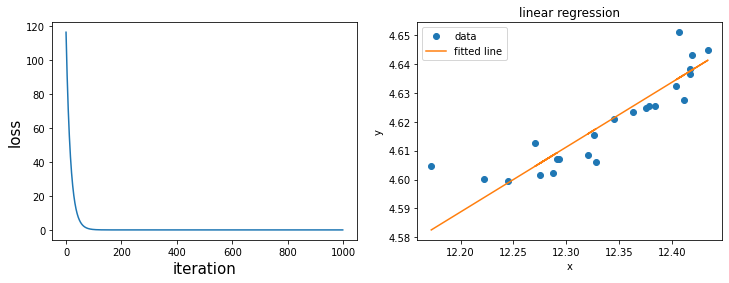

In [25]:
# draw loss
plt.figure(figsize = (12,4))
plt.subplot(121)
plt.plot(loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
#plt.show()

# fitting line
yhat = hypothesis(x_data)
#plt.figure(figsize = (5,3))
plt.subplot(122)
plt.plot(x_data, y_data, 'o', label = 'data')
plt.plot(x_data, yhat, label = 'fitted line')  # np.array(W*x_data+b)
plt.title('linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [26]:
## keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, input_dim=1, activation='linear')) # units = output shape, input_dim = input shape
#model.add(Dense(units=1, input_shape=(1,), activation='linear')) # units = output shape, input_dim = input shape
model.compile(loss = 'mse', optimizer = 'sgd') #metrics = ['accuracy'])
model.summary()
print()

history = model.fit(x_data, y_data, epochs = 3, verbose = 1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________

Epoch 1/3
1/1 [==============================] - 0s 207ms/step - loss: 429.5385
Epoch 2/3
1/1 [==============================] - 0s 9ms/step - loss: 1831.4415
Epoch 3/3
1/1 [==============================] - 0s 6ms/step - loss: 7808.8003


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________



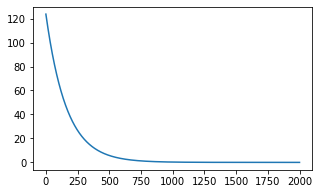

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD 

model = Sequential()
model.add(Dense(units=1, input_dim=1, activation='linear')) # units = output shape, input_dim = input shape
model.compile(loss = 'mse', optimizer = SGD(learning_rate=1e-5)) #metrics = ['accuracy'])
model.summary()
print()

history = model.fit(x_data, y_data, epochs = 2001, verbose = 0)

plt.figure(figsize=(5,3))
plt.plot(history.history['loss'])
plt.show()

weights = 
 [[0.36661473]]
bias = 
 [0.07243406]


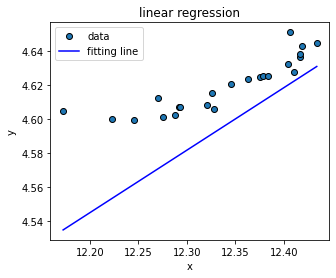

In [28]:
w_hat, b_hat = model.get_weights()
print("weights = \n", w_hat)
print("bias = \n", b_hat)

# visualization(시각화)
xp   = np.linspace(x_data.min(), x_data.max(), x_data.shape[0]).reshape(-1,1) #min,max,개수
#yhat = model.predict(xp)
yhat = b_hat  + w_hat[0]*xp # + w_hat[1]*xp + w_hat[2]*xp

plt.figure(figsize=(5,4))
plt.plot(x_data, y_data, 'o', label='data', markeredgecolor='k')
plt.plot(xp, yhat, 'b-',        label='fitting line') 
plt.title('linear regression')
plt.xlabel("x")
plt.ylabel("y")
plt.xticks()
plt.legend(loc='best')
plt.show()

In [29]:
## statsmodels
import statsmodels.api as sm
x_data_constant = sm.add_constant(x_data)
model = sm.OLS(y_data, x_data_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     77.62
Date:                Sun, 26 Jun 2022   Prob (F-statistic):           1.70e-08
Time:                        13:26:47   Log-Likelihood:                 81.134
No. Observations:                  23   AIC:                            -158.3
Df Residuals:                      21   BIC:                            -156.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2212      0.272      8.158      0.0

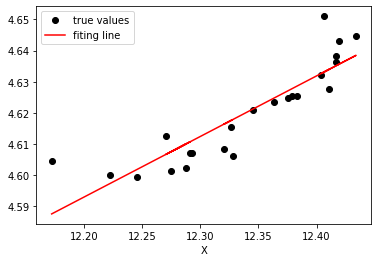

In [30]:
y_pred = model.predict(x_data_constant).reshape(-1,1)

plt.figure(figsize = (6,4))
plt.plot(x_data, y_data, 'ko',    label='true values')
plt.plot(x_data, y_pred, 'r', label='fiting line')
plt.xlabel('X')
plt.legend()
plt.show()
